 load the data and inspect it.

In [1]:
import pandas as pd

# Load the dataset
file_path = 'MarketPricePrediction.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,January-2005
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,January-2006
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,January-2010
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,January-2011
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,January-2012


Handling Missing Values

In [2]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values

market      0
month       0
year        0
quantity    0
priceMin    0
priceMax    0
priceMod    0
state       0
city        0
date        0
dtype: int64

Converting date column to datetime

In [3]:
# Concatenate month and year to form the full date string
df['date'] = pd.to_datetime(df['month'] + '-' + df['year'].astype(str), format='%B-%Y')

# Drop the redundant columns `month` and `year` as `date` column now serves that purpose
df = df.drop(columns=['month', 'year'])

# Display the first few rows to verify the changes
df.head()

,market,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),2350,404,493,446,PB,ABOHAR,2005-01-01
1,ABOHAR(PB),900,487,638,563,PB,ABOHAR,2006-01-01
2,ABOHAR(PB),790,1283,1592,1460,PB,ABOHAR,2010-01-01
3,ABOHAR(PB),245,3067,3750,3433,PB,ABOHAR,2011-01-01
4,ABOHAR(PB),1035,523,686,605,PB,ABOHAR,2012-01-01


Encoding categorical columns

In [4]:
# One-hot encode categorical columns market, state, and city
df = pd.get_dummies(df, columns=['market', 'state', 'city'])

# Display the first few rows to verify the changes
df.head()

,quantity,priceMin,priceMax,priceMod,date,market_ABOHAR(PB),market_AGRA(UP),market_AHMEDABAD(GUJ),market_AHMEDNAGAR(MS),market_AJMER(RAJ),...,city_SRIGANGANAGAR,city_SRINAGAR,city_SRIRAMPUR,city_SURAT,city_TRIVENDRUM,city_UDAIPUR,city_UJJAIN,city_VANI,city_VARANASI,city_YEOLA
0,2350,404,493,446,2005-01-01,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,900,487,638,563,2006-01-01,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,790,1283,1592,1460,2010-01-01,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,245,3067,3750,3433,2011-01-01,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1035,523,686,605,2012-01-01,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


The dataset now contains a mix of numerical and one-hot encoded columns along with the date column in datetime format.

Summary of the Data Preprocessing step:

Data loaded successfully.

No missing values found.

Date-related columns (month and year) were consolidated into a single date column.

Categorical columns (market, state, city) have been one-hot encoded.


Next, we will proceed to the Exploratory Data Analysis (EDA) phase.

Exploratory Data Analysis (EDA)

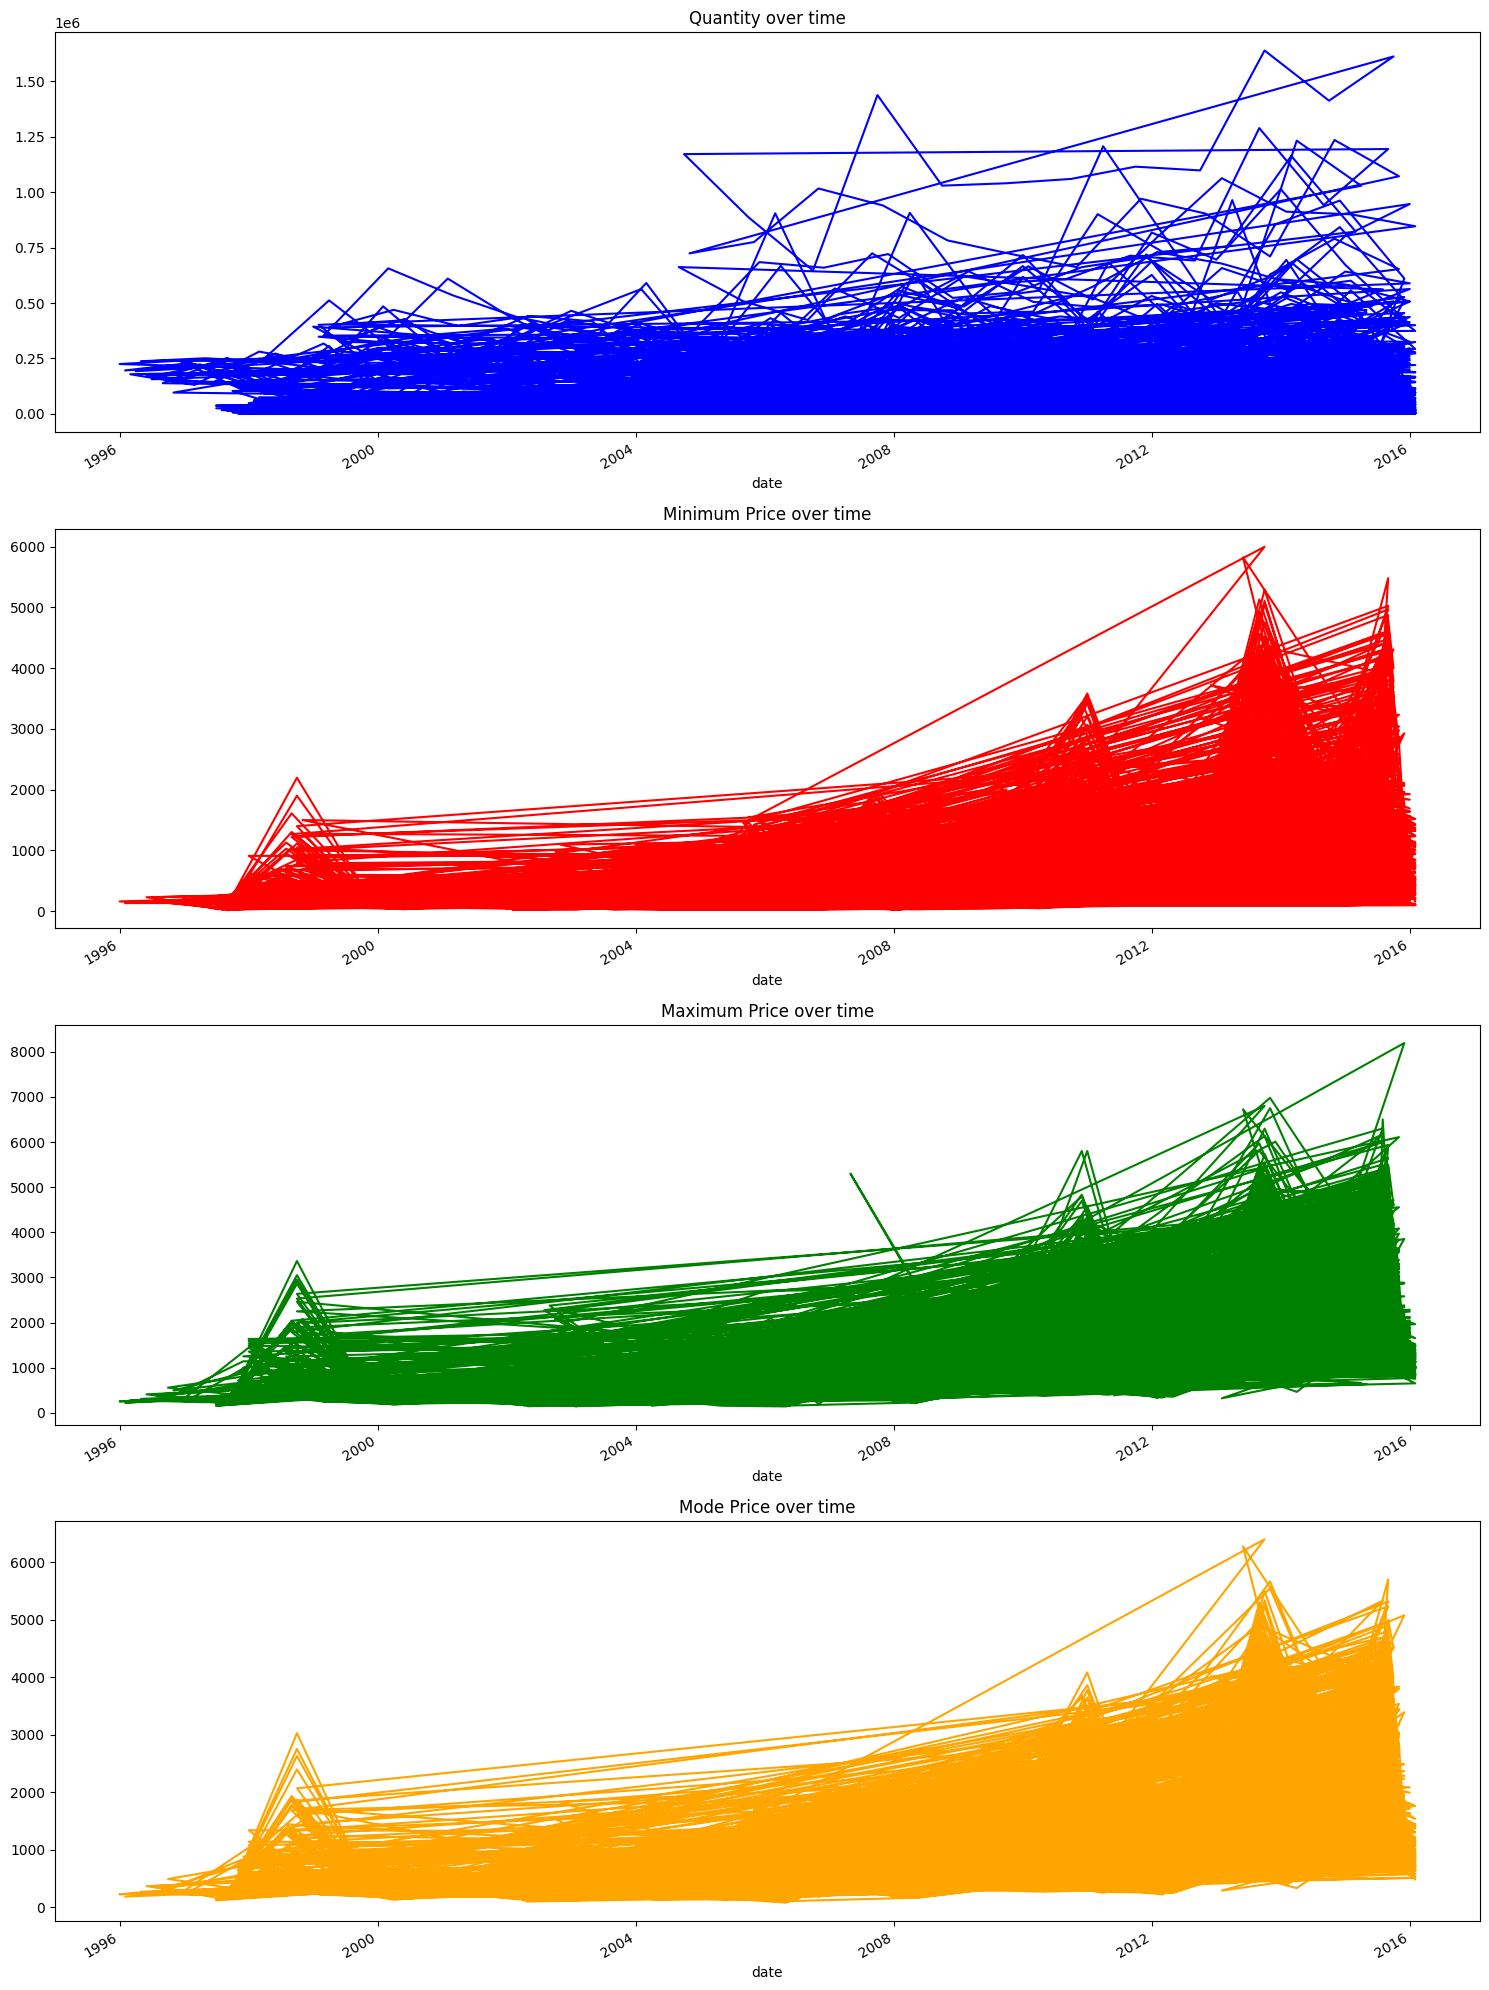

In [5]:
import matplotlib.pyplot as plt

# Plot the time series for quantity, priceMin, priceMax, and priceMod
fig, axs = plt.subplots(4, 1, figsize=(15, 20))

df.set_index('date')['quantity'].plot(ax=axs[0], title='Quantity over time', color='blue')
df.set_index('date')['priceMin'].plot(ax=axs[1], title='Minimum Price over time', color='red')
df.set_index('date')['priceMax'].plot(ax=axs[2], title='Maximum Price over time', color='green')
df.set_index('date')['priceMod'].plot(ax=axs[3], title='Mode Price over time', color='orange')

plt.tight_layout()
plt.show()

Looks like the dataframe isn't sorted properly it should be like this: Market, year, month

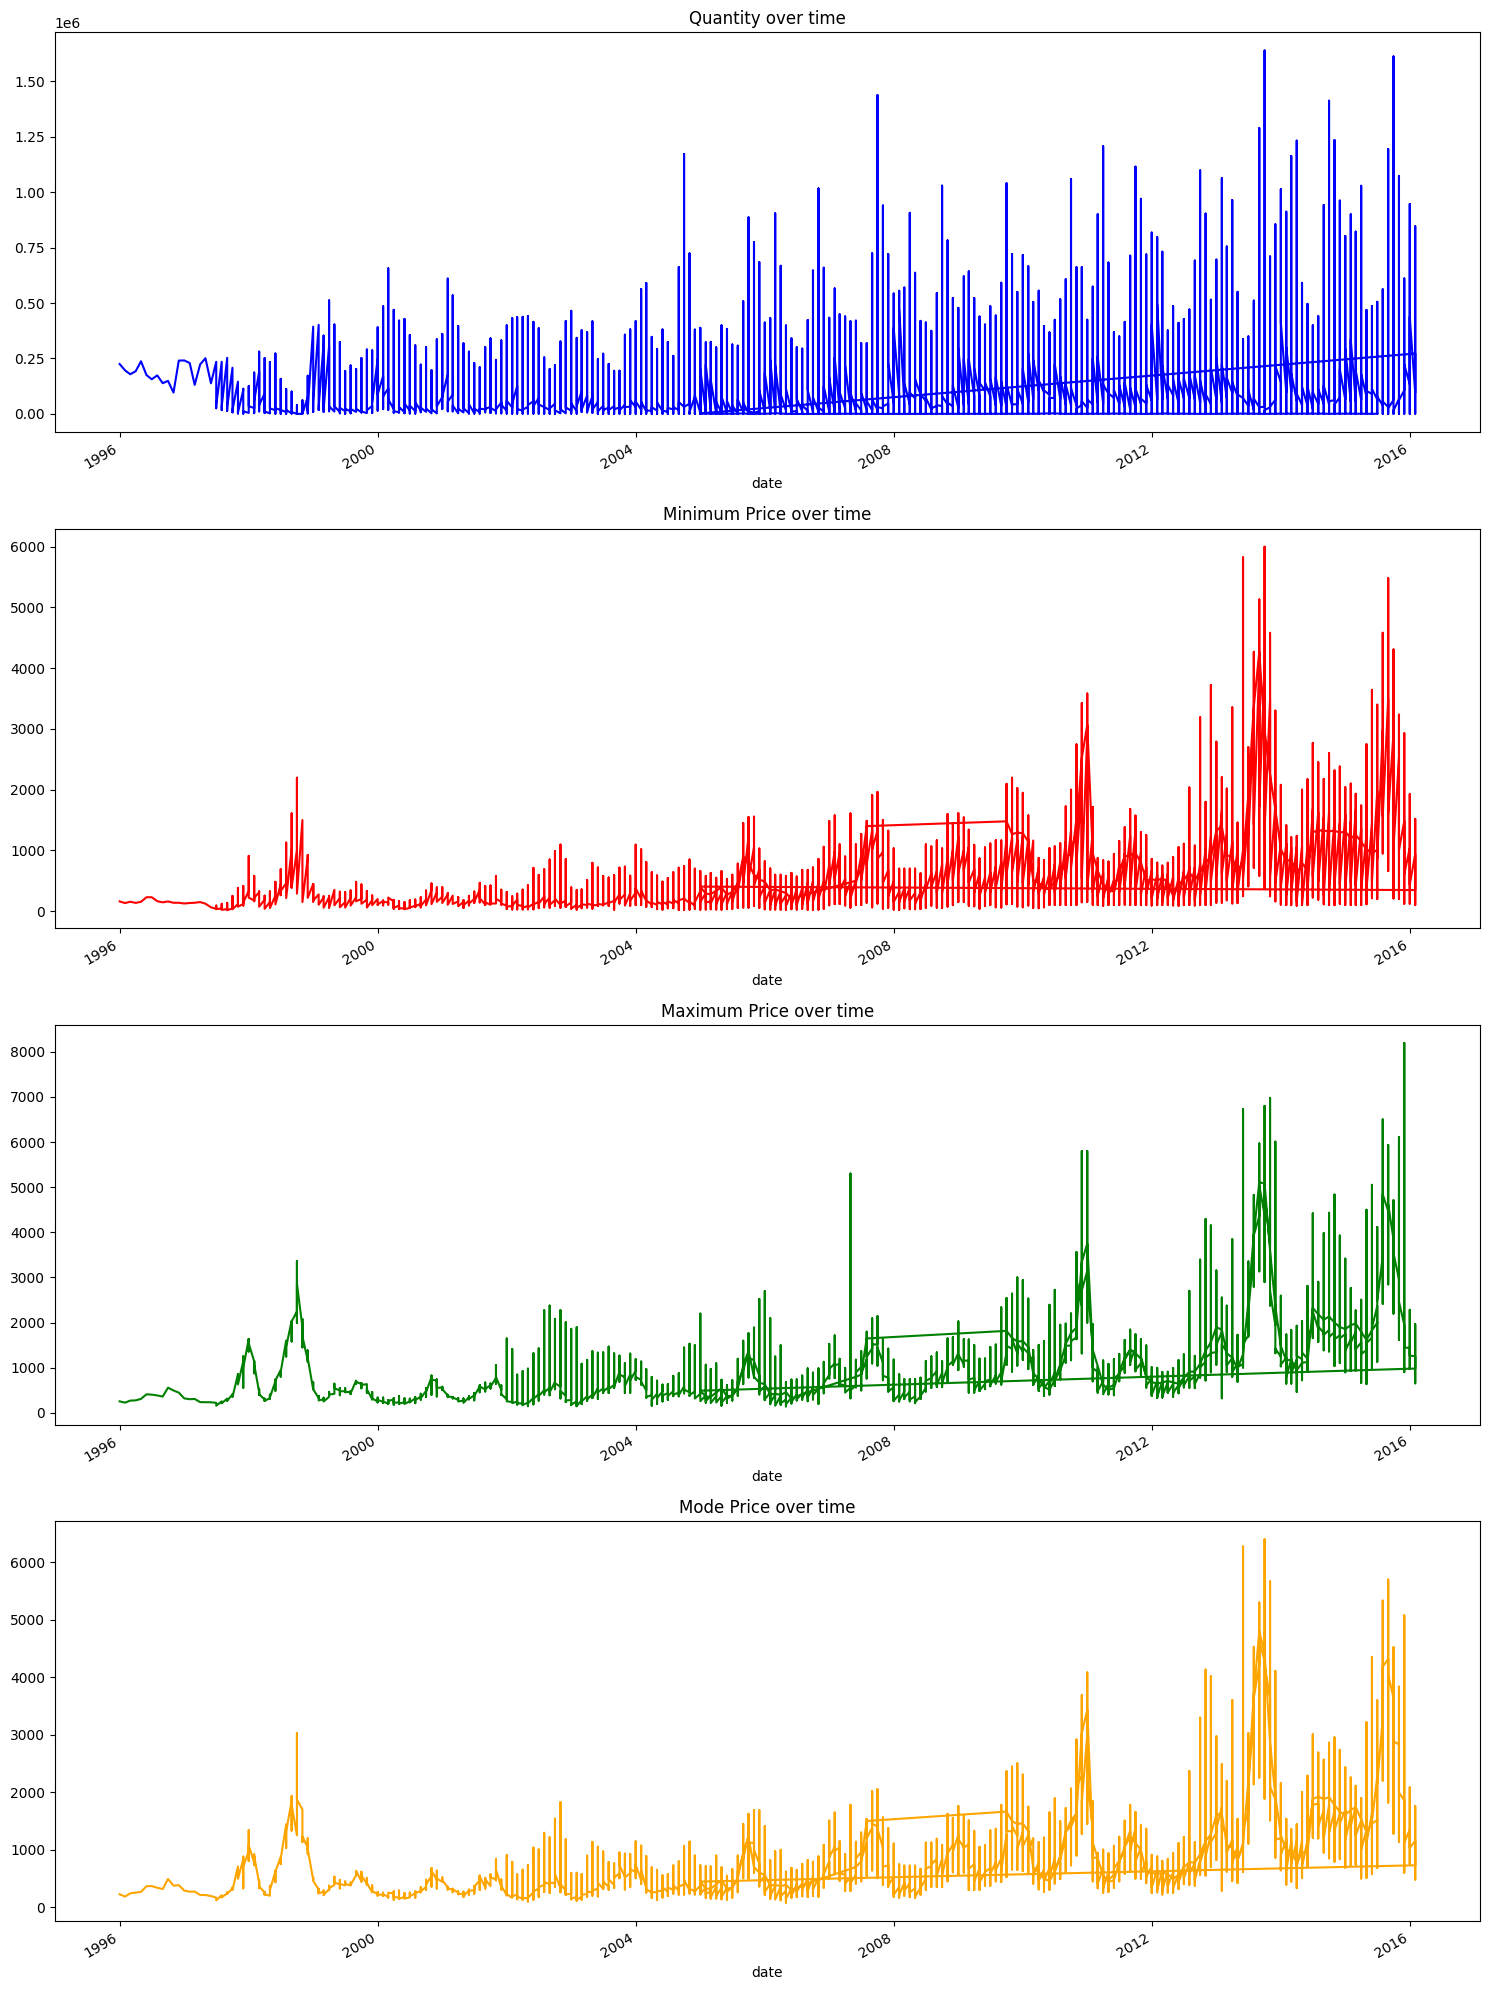

In [6]:
# Sort the data by market and date
df = df.sort_values(by=['market_ABOHAR(PB)', 'date'])

# Plot the time series for quantity, priceMin, priceMax, and priceMod again
fig, axs = plt.subplots(4, 1, figsize=(15, 20))

df.set_index('date')['quantity'].plot(ax=axs[0], title='Quantity over time', color='blue')
df.set_index('date')['priceMin'].plot(ax=axs[1], title='Minimum Price over time', color='red')
df.set_index('date')['priceMax'].plot(ax=axs[2], title='Maximum Price over time', color='green')
df.set_index('date')['priceMod'].plot(ax=axs[3], title='Mode Price over time', color='orange')

plt.tight_layout()
plt.show()

Observations:

There is noticeable variability in quantity, priceMin, priceMax, and priceMod.

There appears to be seasonality and trends over the years, especially in the price columns.


Correlation Analysis for the most important variables

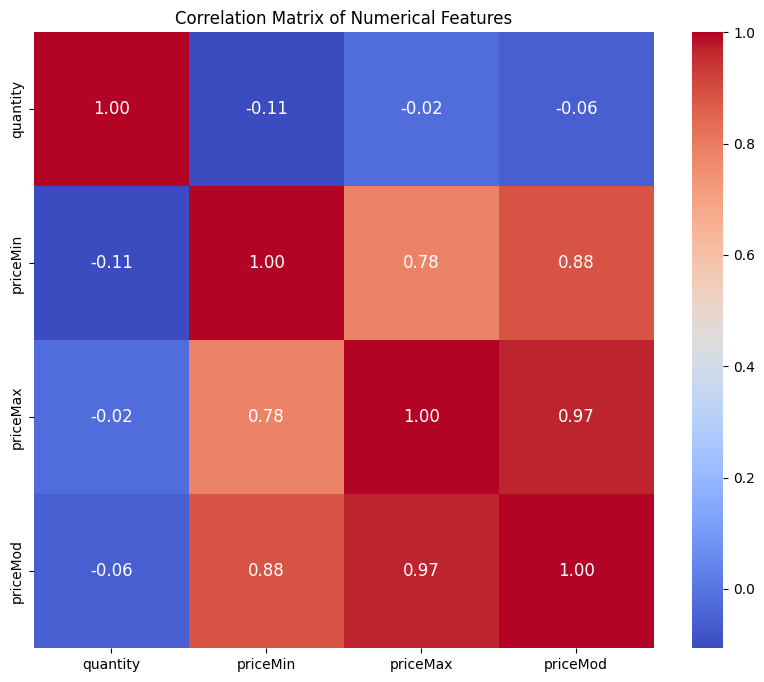

In [7]:
import seaborn as sns

# Select only the numerical columns
numerical_columns = ['quantity', 'priceMin', 'priceMax', 'priceMod']
correlation_matrix = df[numerical_columns].corr()

# Plot the correlation matrix with annotations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', annot_kws={"size": 12})
plt.title("Correlation Matrix of Numerical Features")
plt.show()

Observations:

priceMax and priceMod have a very high positive correlation (0.97).

priceMin is also highly correlated with both priceMax (0.78) and priceMod (0.88).

quantity has a weak negative correlation with the price features.



Seasonality and Trend Analysis

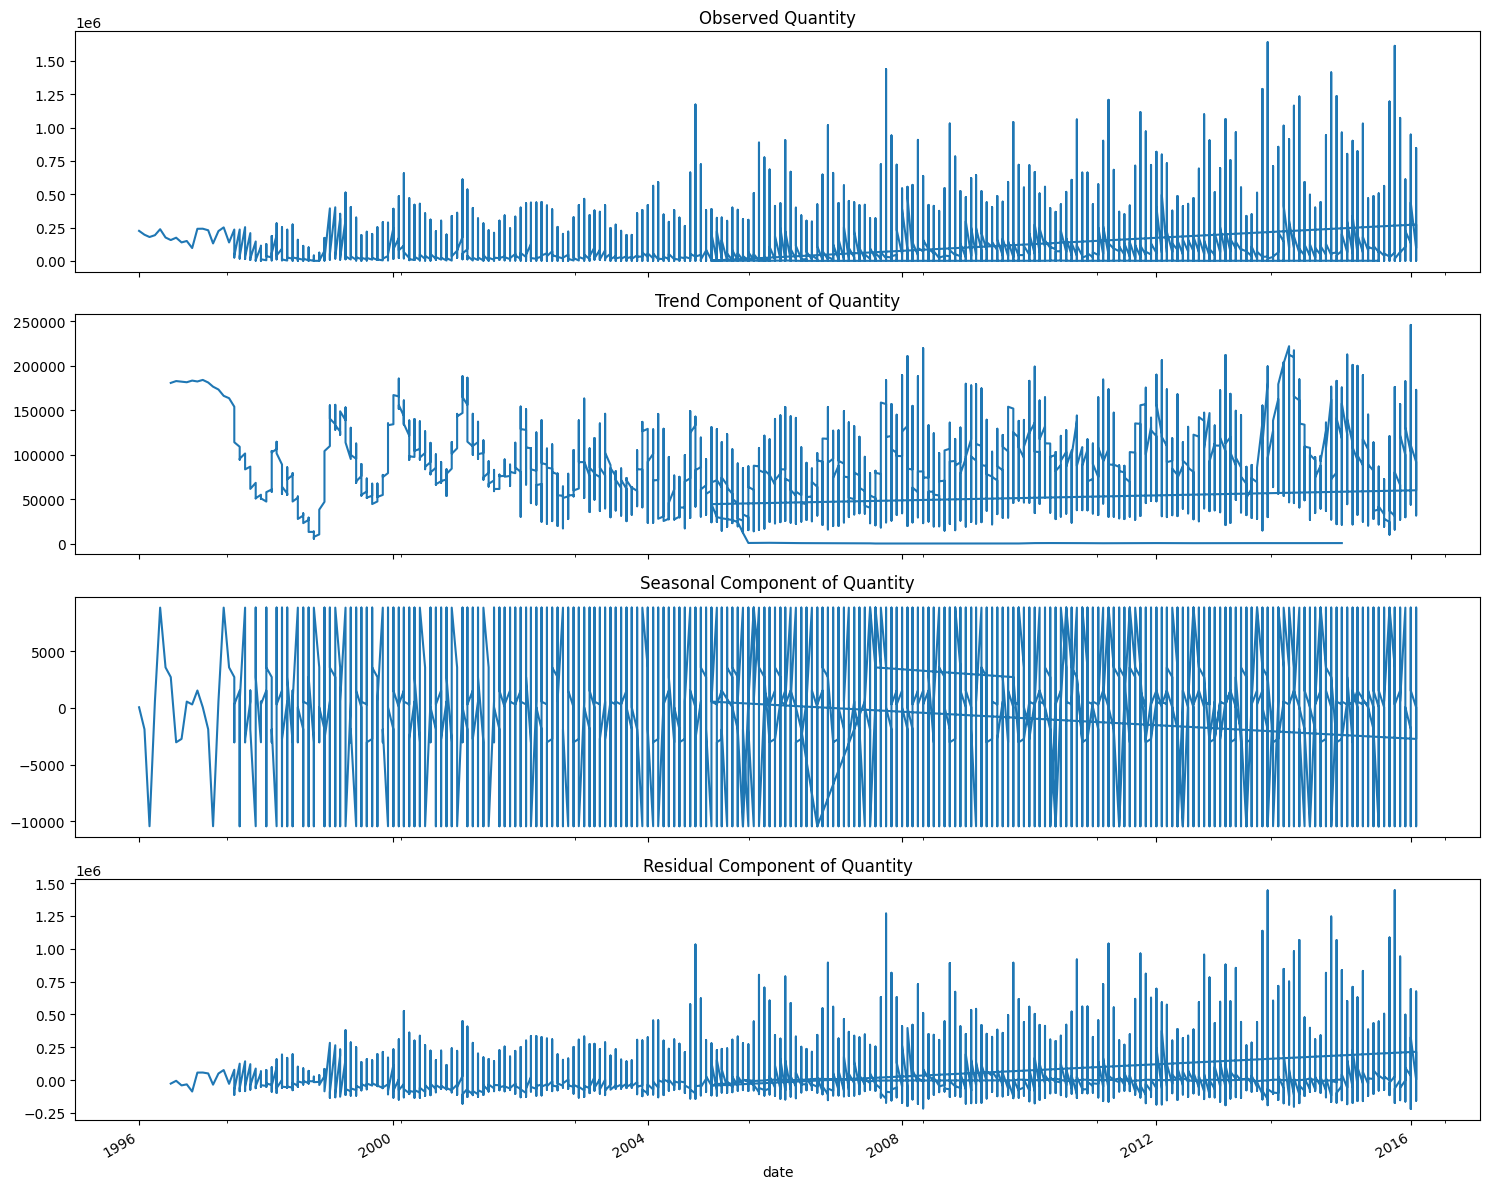

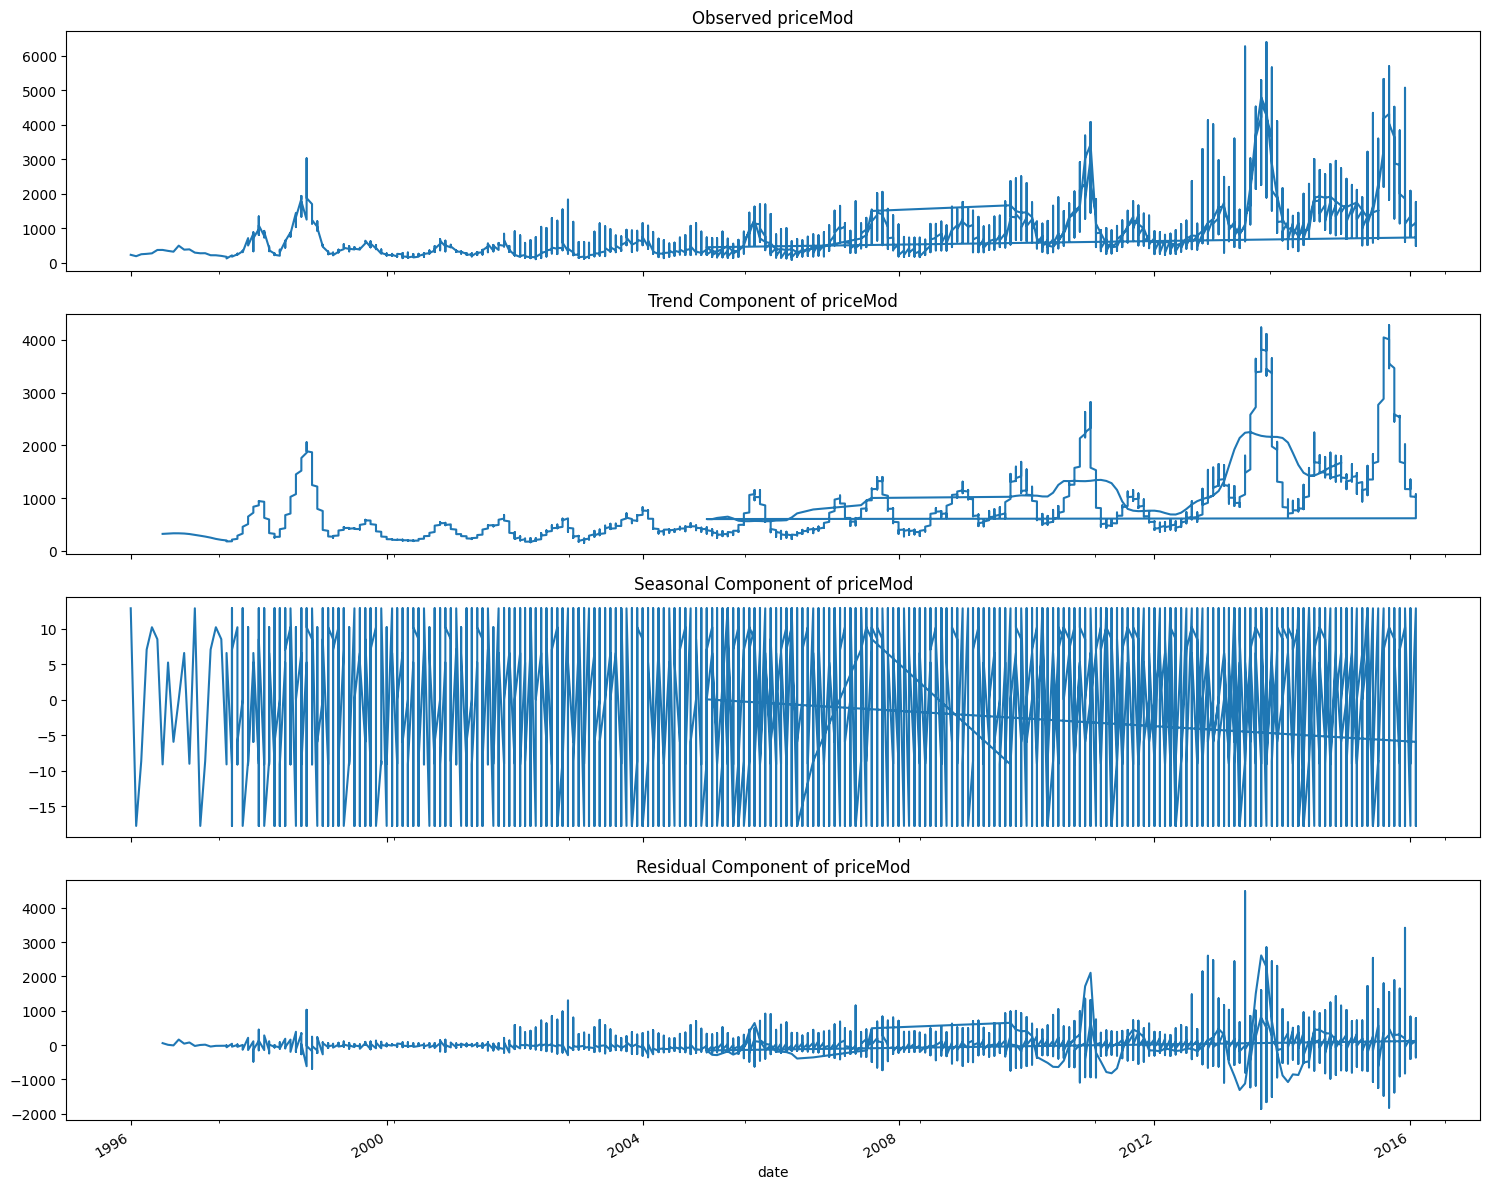

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform the seasonal decomposition for the 'quantity' and 'priceMod' time series
decomposition_quantity = seasonal_decompose(df.set_index('date')['quantity'], model='additive', period=12)
decomposition_priceMod = seasonal_decompose(df.set_index('date')['priceMod'], model='additive', period=12)

# Plot the decomposition results for 'quantity'
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 12), sharex=True)
decomposition_quantity.observed.plot(ax=ax1, title='Observed Quantity')
decomposition_quantity.trend.plot(ax=ax2, title='Trend Component of Quantity')
decomposition_quantity.seasonal.plot(ax=ax3, title='Seasonal Component of Quantity')
decomposition_quantity.resid.plot(ax=ax4, title='Residual Component of Quantity')
plt.tight_layout()
plt.show()

# Plot the decomposition results for 'priceMod'
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 12), sharex=True)
decomposition_priceMod.observed.plot(ax=ax1, title='Observed priceMod')
decomposition_priceMod.trend.plot(ax=ax2, title='Trend Component of priceMod')
decomposition_priceMod.seasonal.plot(ax=ax3, title='Seasonal Component of priceMod')
decomposition_priceMod.resid.plot(ax=ax4, title='Residual Component of priceMod')
plt.tight_layout()
plt.show()

Extract Date Features

Extract additional features from the date column, such as month, quarter, and year.

In [9]:
# Create lag features
for lag in range(1, 13):  # lags from 1 to 12 months
    df[f'quantity_lag_{lag}'] = df['quantity'].shift(lag)
    df[f'priceMin_lag_{lag}'] = df['priceMin'].shift(lag)
    df[f'priceMax_lag_{lag}'] = df['priceMax'].shift(lag)
    df[f'priceMod_lag_{lag}'] = df['priceMod'].shift(lag)

# Create rolling statistics features
for window in [3, 6, 12]:  # windows of 3, 6, and 12 months
    df[f'quantity_roll_mean_{window}'] = df['quantity'].rolling(window=window).mean()
    df[f'quantity_roll_std_{window}'] = df['quantity'].rolling(window=window).std()
    df[f'priceMin_roll_mean_{window}'] = df['priceMin'].rolling(window=window).mean()
    df[f'priceMin_roll_std_{window}'] = df['priceMin'].rolling(window=window).std()
    df[f'priceMax_roll_mean_{window}'] = df['priceMax'].rolling(window=window).mean()
    df[f'priceMax_roll_std_{window}'] = df['priceMax'].rolling(window=window).std()
    df[f'priceMod_roll_mean_{window}'] = df['priceMod'].rolling(window=window).mean()
    df[f'priceMod_roll_std_{window}'] = df['priceMod'].rolling(window=window).std()

# Extract date features
df['month'] = df['date'].dt.month
df['quarter'] = df['date'].dt.quarter
df['year'] = df['date'].dt.year

# Remove rows with NaN values created by shifting and rolling operations
df = df.dropna()

# Display the first few rows to verify the changes
df.head()

,quantity,priceMin,priceMax,priceMod,date,market_ABOHAR(PB),market_AGRA(UP),market_AHMEDABAD(GUJ),market_AHMEDNAGAR(MS),market_AJMER(RAJ),...,quantity_roll_std_12,priceMin_roll_mean_12,priceMin_roll_std_12,priceMax_roll_mean_12,priceMax_roll_std_12,priceMod_roll_mean_12,priceMod_roll_std_12,month,quarter,year
5400,241225,126,323,290,1997-01-01,False,False,False,False,False,...,44135.576936,158.916667,34.692043,374.666667,97.818323,323.916667,81.700627,1,1,1997
5421,229550,134,305,271,1997-02-01,False,False,False,False,False,...,46157.397208,159.000000,34.625267,381.000000,89.648810,331.000000,71.733091,2,1,1997
5442,130885,138,310,273,1997-03-01,False,False,False,False,False,...,48669.151976,157.583333,35.147632,384.000000,86.281779,333.500000,68.852279,3,1,1997
5462,223608,149,240,214,1997-04-01,False,False,False,False,False,...,50188.963802,158.666667,34.618265,380.750000,91.191233,330.166667,73.838686,4,2,1997
5482,251132,123,238,213,1997-05-01,False,False,False,False,False,...,51666.212741,156.083333,36.122162,374.583333,98.474231,325.500000,79.600708,5,2,1997


Model Selection and Training

Selecting the model: Evaluating simple models like ARIMA and PROPHET to see how well they perform.

Training the model: Train these models on a subset of the data and evaluate their performance.

c:\Users\exe\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\exe\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\exe\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:               quantity   No. Observations:                10215
Model:                 ARIMA(5, 1, 0)   Log Likelihood             -135016.120
Date:                Fri, 31 May 2024   AIC                         270044.240
Time:                        17:03:12   BIC                         270087.629
Sample:                             0   HQIC                        270058.912
                              - 10215                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7995      0.008    -99.846      0.000      -0.815      -0.784
ar.L2         -0.6641      0.011    -61.651      0.000      -0.685      -0.643
ar.L3         -0.5043      0.012    -43.367      0.0

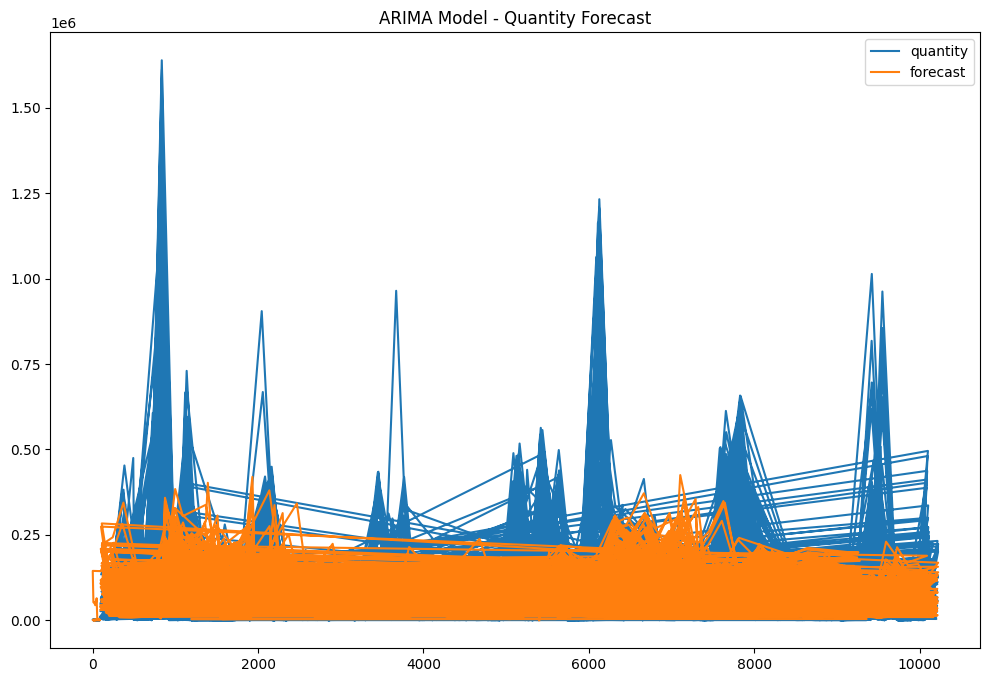

In [10]:
from statsmodels.tsa.arima.model import ARIMA

# Define the ARIMA model
model = ARIMA(df['quantity'], order=(5, 1, 0))  # Example order, can be tuned further

# Fit the ARIMA model
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Plot the forecasts
df['forecast'] = model_fit.predict(start=0, end=len(df)-1, dynamic=False)
df[['quantity', 'forecast']].plot(figsize=(12, 8))
plt.title("ARIMA Model - Quantity Forecast")
plt.show()

Double-checking Sorting by Market and Date

C:\Users\exe\AppData\Local\Temp\ipykernel_7844\1472452855.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  specific_market_data['forecast'] = model_fit.predict(start=0, end=len(specific_market_data)-1, dynamic=False)


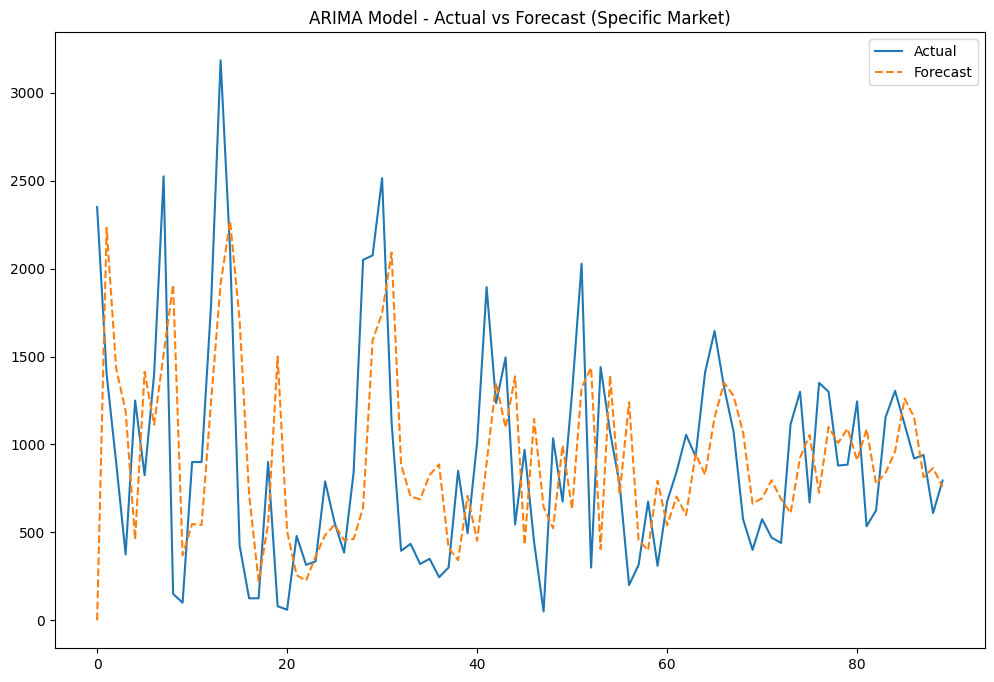

In [11]:
# Ensure the data is sorted by all relevant columns (market and date, for instance)
df_sorted = df.sort_values(['market_ABOHAR(PB)', 'date'])

# Subset the data to a specific market for better visualization
specific_market_data = df_sorted[df_sorted['market_ABOHAR(PB)'] == 1]

# Reset index for convenience
specific_market_data.reset_index(drop=True, inplace=True)

# Model training on this specific subset
from statsmodels.tsa.arima.model import ARIMA

# Define the ARIMA model
model = ARIMA(specific_market_data['quantity'], order=(5, 1, 0))

# Fit the ARIMA model
model_fit = model.fit()

# Forecast values
specific_market_data['forecast'] = model_fit.predict(start=0, end=len(specific_market_data)-1, dynamic=False)

# Plot the actual vs predicted values
plt.figure(figsize=(12, 8))
plt.plot(specific_market_data['quantity'], label='Actual')
plt.plot(specific_market_data['forecast'], label='Forecast', linestyle='--')
plt.title("ARIMA Model - Actual vs Forecast (Specific Market)")
plt.legend()
plt.show()

For aggregated data, the ARIMA model struggled to make accurate predictions.
Segregating by specific market subsets likely improved its performance by capturing more detailed patterns.

Moving on to LSTM

Prepare the Data

Scale the features.

Reshape the data to be suitable for LSTM's input format (3D tensor).


In [24]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Prepare data
def prepare_data(df, target_column, time_steps):
    data = df[[target_column]].values
    scaler = MinMaxScaler(feature_range=(0, 1))
    data_scaled = scaler.fit_transform(data)
    
    X, y = [], []
    for i in range(time_steps, len(data_scaled)):
        X.append(data_scaled[i-time_steps:i, 0])
        y.append(data_scaled[i, 0])
    
    X, y = np.array(X), np.array(y)
    X = X.reshape((X.shape[0], X.shape[1], 1))  # Reshaping for LSTM

    return X, y, scaler


In [25]:

# Load and preprocess data
df_sorted = df.sort_values(by=['market_ABOHAR(PB)', 'date'])
time_steps = 12  # Using 12 months of data to predict the next month

X, y, scaler = prepare_data(df_sorted, 'quantity', time_steps)

# Split into training and test sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [26]:

# Define the LSTM Model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)


Epoch 1/20


c:\Users\exe\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


205/205 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0050 - val_loss: 0.0074
Epoch 2/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0049 - val_loss: 0.0074
Epoch 3/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0047 - val_loss: 0.0073
Epoch 4/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0046 - val_loss: 0.0076
Epoch 5/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0047 - val_loss: 0.0074
Epoch 6/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0046 - val_loss: 0.0073
Epoch 7/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0046 - val_loss: 0.0073
Epoch 8/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0046 - val_loss: 0.0073
Epoch 9/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0048 - val_loss: 0.0073
Epoch 10/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0048 - val_loss: 0.0073
Epoch 11/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0048 - val_loss: 0.0073
Epoch 12/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.

64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Mean Absolute Error (MAE): 80705.71203176302
Mean Squared Error (MSE): 20560745283.524887
Root Mean Squared Error (RMSE): 143390.18545048643


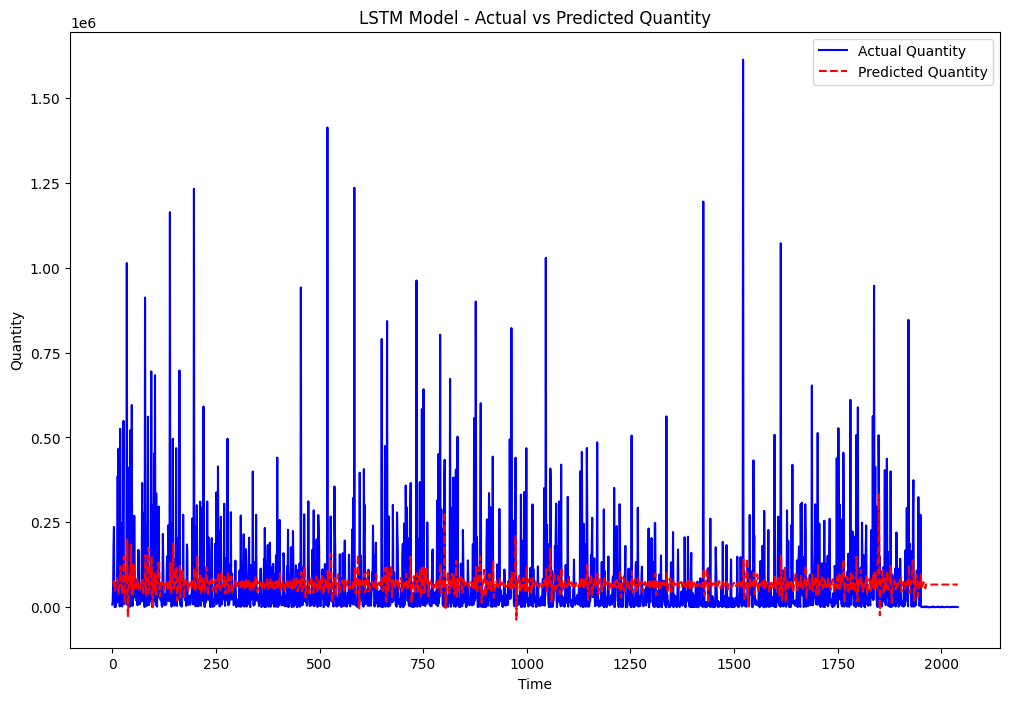

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Make predictions
predicted_quantity = model.predict(X_test)
predicted_quantity = scaler.inverse_transform(predicted_quantity)
real_quantity = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculating metrics
mae = mean_absolute_error(real_quantity, predicted_quantity)
mse = mean_squared_error(real_quantity, predicted_quantity)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Evaluate the model
plt.figure(figsize=(12, 8))
plt.plot(real_quantity, color='blue', label='Actual Quantity')
plt.plot(predicted_quantity, color='red', linestyle='--', label='Predicted Quantity')
plt.title('LSTM Model - Actual vs Predicted Quantity')
plt.xlabel('Time')
plt.ylabel('Quantity')
plt.legend()
plt.show()